In [35]:
import numpy as np
import pandas as pd
import pylab as plt

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['SimHei']#正常显示标签

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
t = df['Time (s)']
ax = df['Acceleration x (m/s^2)']
ax =np.array(ax)
'''
num = len(t)
fft=np.fft.fft(ax,num)
fftshift=np.fft.fftshift(fft)
amp=abs(fftshift)/len(fft)
pha=np.angle(fftshift)
fre=np.fft.fftshift(np.fft.fftfreq(d=1,n=num))
'''

def get_fft_power_spectrum(y_values, N, T):
    f_values = T
    k = int(N/2)
    fft_values_ = np.abs(np.fft.fft(y_values))
    fft_values = 2.0/N * (fft_values_[0:k])    # 频率真实幅值分布，单边频谱图，再把所有点频率大小表示出来*2
 
    # power spectrum 直接周期法
    ps_values = fft_values**2 / N
 
    # 自相关傅里叶变换法
    cor_x = np.correlate(y_values, y_values, 'same')    # 自相关
    cor_X = np.fft.fft(cor_x, N)                 
    ps_cor = np.abs(cor_X)
    
    ps_cor_values = 10*np.log10(ps_cor[0:k] / np.max(ps_cor))
    
    return f_values, fft_values, ps_values, ps_cor_values


N = len(t)
f_s = 12000
 
f_values, fft_values, ps_values, ps_cor_values = get_fft_power_spectrum(ax, N, t)
# 直接取周期法功率
P = ps_values
f = fft_values
 
S = []
for i in range(N//2):
    P1 = P[i]
    f1 = fft_values[i]
    s1 = P1*f1
    S.append(s1)
print(S)
# 求取重心频率
S1 = np.sum(S)/np.sum(P)
print(S1)

[0.057418620451244004, 0.12165263489298202, 0.010171793416929111, 2.6475297834013497e-05, 5.388301709801094e-05, 8.91350650250069e-05, 3.420250768555133e-05, 1.5571615540273368e-05, 1.6604386659547742e-05, 8.909045839902287e-07, 3.200498574102826e-06, 1.1954483129986575e-05, 2.6178604922888656e-06, 1.2809138685501998e-06, 7.06826489481778e-06, 5.761728305715018e-07, 3.108616233127613e-07, 2.3486306687445075e-08, 1.2632672158902195e-05, 3.6056483959795747e-06, 2.1224624766016456e-06, 2.1008531938579876e-06, 1.0756748188824518e-05, 3.5902299293768416e-07, 8.098771104517056e-07, 4.033443033819978e-06, 4.1483851197445876e-06, 3.0395880889360066e-06, 3.192029451972032e-06, 1.6989556364295485e-05, 2.51103257821659e-05, 9.540930822130025e-06, 1.8597222908045944e-06, 1.4840536447576982e-06, 1.2502738471005064e-05, 3.443760435079595e-06, 4.401455850678304e-06, 6.046826160169172e-06, 3.453863659266369e-06, 4.6399668076974744e-07, 3.88628529448466e-06, 1.0626042196515948e-05, 2.9342896995632583e-

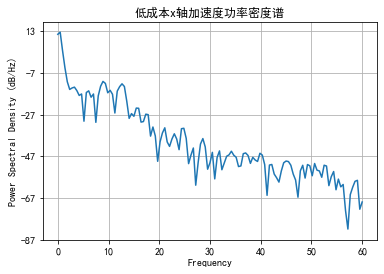

ValueError: x and y must have same first dimension, but have shapes (191, 1) and (192,)

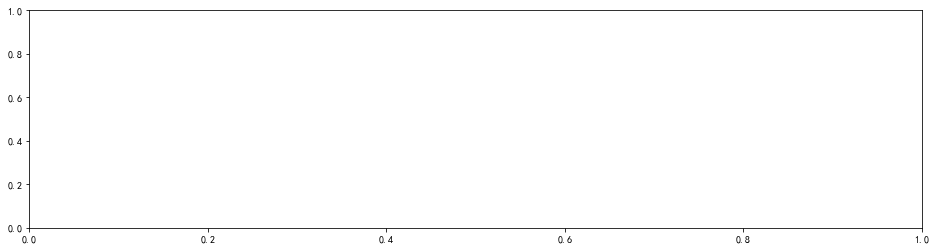

In [45]:
# 离散时间傅里叶变换的 python 实现
import numpy as np
import math
import pylab as pl
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 01.csv"
df = pd.read_csv(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
sampling_rate = len(t1) / t1.tail(1)

# t1=np.arange(0, 10.0, 1.0/sampling_rate)
# x1 =np.sin(15*np.pi*t1)

# 傅里叶变换
def fft1(xx):
#     t=np.arange(0, s)
    t=np.linspace(0, 1.0, len(xx))
    f = np.arange(len(xx)/2+1, dtype=complex)
    for index in range(len(f)):
        f[index]=complex(np.sum(np.cos(2*np.pi*index*t)*xx), -np.sum(np.sin(2*np.pi*index*t)*xx))
    return f

# len(x1)

plt.psd(x1,Fs = 1/(t1[1]-t[0]))
plt.title('低成本x轴加速度功率密度谱')
plt.show()

#下面是实数的傅里叶变换的代码

xf=fft1(x1)/len(x1)
freqs = np.linspace(0, sampling_rate/2, len(x1)//2+1)
plt.figure(figsize=(16,4))
plt.plot(freqs,2*np.abs(xf),'r--')

plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude($m$)")
plt.title("Amplitude-Frequency curve")

plt.show()



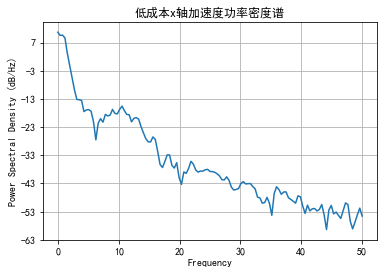

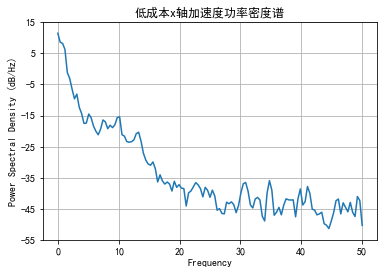

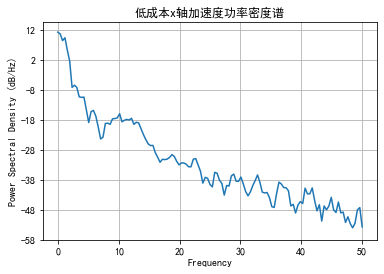

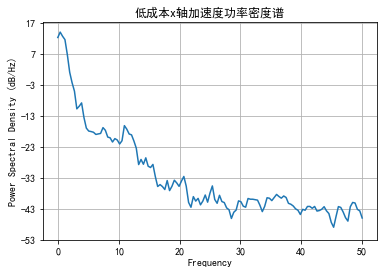

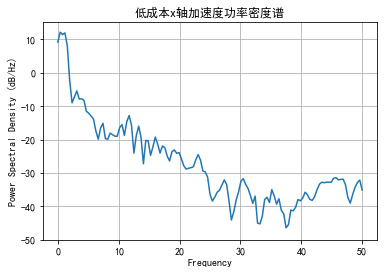

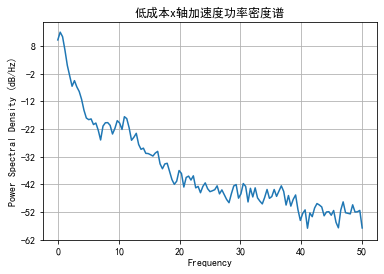

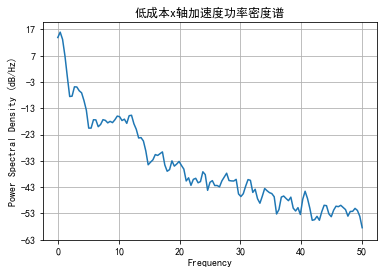

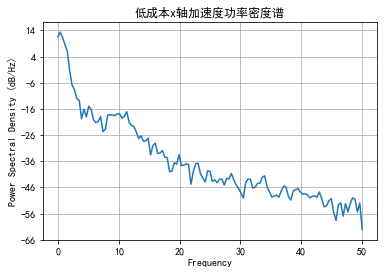

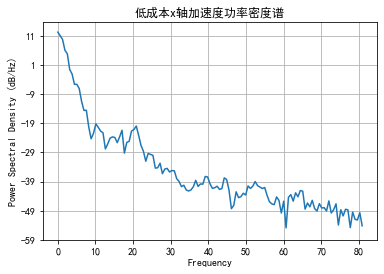

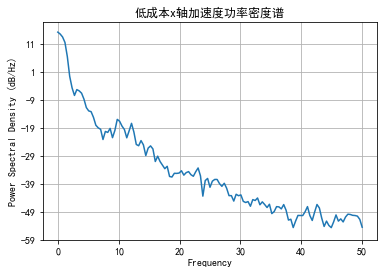

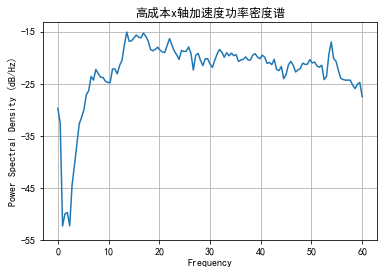

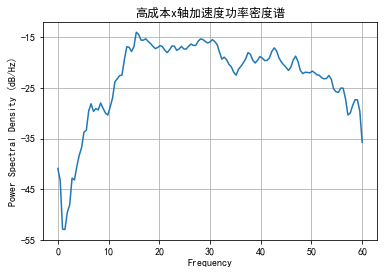

In [47]:
import numpy as np
import math
import pylab as pl
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 01.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 02.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 03.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 04.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 05.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 06.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()


path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 07.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()


path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 08.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()


path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 09.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
t1 + 0.00548
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()


path1 = r"D:\HongliCup\题目B\低成本传感器数据\low-cost sensor B 10.xls"
df = pd.read_excel(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 100)
plt.title('低成本x轴加速度功率密度谱')
plt.show()



path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 11.csv"
df = pd.read_csv(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 1/(t1[1]-t[0]))
plt.title('高成本x轴加速度功率密度谱')
plt.show()

path1 = r"D:\HongliCup\题目B\高成本传感器数据\High quality sensor 12.csv"
df = pd.read_csv(path1)
t1 = df['Time (s)']
x1 = df['Acceleration x (m/s^2)']
plt.psd(x1,Fs = 1/(t1[1]-t[0]))
plt.title('高成本x轴加速度功率密度谱')
plt.show()
